# **Exploración de datos**

In [ ]:
# Se importan librerías
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Base de datos**

In [ ]:
# Se importa base de datos de de DIM_TIENDA
df = pd.read_csv("/content/drive/My Drive/1a IMT_Facultad/Datathon 25/DIM_TIENDA.csv")
print(f"Total number of elements in the DataFrame: {df.shape}")
df.head()

Total number of elements in the DataFrame: (951, 12)


,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
0,126,1,BC,Hogar,127.42,13,7,25.69107,-100.21261,Hogar Reunión,UT_DENSIDAD,TRAIN
1,681,1,C,Hogar,128.13,13,0,25.73571,-100.18086,Hogar Reunión,UT_DENSIDAD,TRAIN
2,117,1,C,Base,87.62,11,11,25.71883,-100.19133,Hogar Reunión,UT_DENSIDAD,TRAIN
3,682,1,C,Hogar,90.70,13,0,25.66952,-100.20744,Hogar Reunión,UT_DENSIDAD,TRAIN
4,275,1,C,Hogar,95.30,13,6,25.73766,-100.16116,Hogar Reunión,UT_DENSIDAD,TRAIN


In [ ]:
# Visualización de datos con 0s
for i in df.columns:
    print(f"{i} : {(df[i]==0).sum()}")

TIENDA_ID : 0
PLAZA_CVE : 0
NIVELSOCIOECONOMICO_DES : 0
ENTORNO_DES : 0
MTS2VENTAS_NUM : 267
PUERTASREFRIG_NUM : 197
CAJONESESTACIONAMIENTO_NUM : 517
LATITUD_NUM : 2
LONGITUD_NUM : 2
SEGMENTO_MAESTRO_DESC : 0
LID_UBICACION_TIENDA : 0
DATASET : 0


In [ ]:
# Outliers
outlier  = df[df["LATITUD_NUM"].notnull() & (df["LATITUD_NUM"] == 0)]
df = df[df["LATITUD_NUM"].notnull() & (df["LATITUD_NUM"] > 0)]
outlier.head()

,TIENDA_ID,PLAZA_CVE,NIVELSOCIOECONOMICO_DES,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,CAJONESESTACIONAMIENTO_NUM,LATITUD_NUM,LONGITUD_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,DATASET
344,858,2,C,Receso,0.0,0,0,0.0,0.0,Parada Técnica,UT_TRAFICO_VEHICULAR,TRAIN
680,857,5,C,Hogar,0.0,0,0,0.0,0.0,Hogar Reunión,UT_DENSIDAD,TRAIN


## Visualización de datos


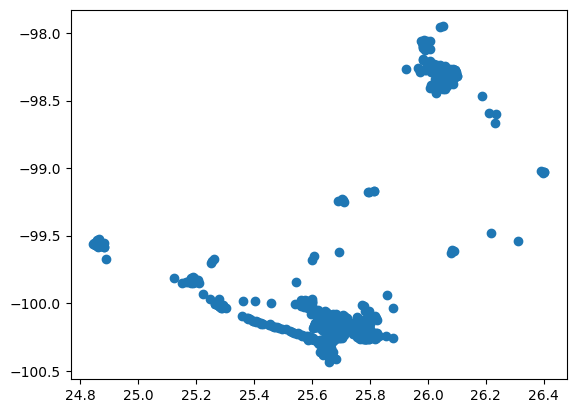

In [ ]:
plt.scatter(df["LATITUD_NUM"], df["LONGITUD_NUM"])
plt.show()

In [ ]:
import folium

# Calculate average latitude and longitude for centering (optional)
center_lat = df['LATITUD_NUM'].mean()
center_lon = df['LONGITUD_NUM'].mean()

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10) # Adjust zoom_start as needed

for index, row in df.iterrows():
        folium.Marker([row['LATITUD_NUM'], row['LONGITUD_NUM']]).add_to(m)
display(m)

In [ ]:
from folium.plugins import HeatMap
data = [[row['LATITUD_NUM'], row['LONGITUD_NUM']] for index, row in df.iterrows()]

center_lat = df['LATITUD_NUM'].mean()
center_lon = df['LONGITUD_NUM'].mean()

# Create the map
m = folium.Map(location=[center_lat, center_lon], zoom_start=10) # Adjust zoom_start as neededHeatMap(data).add_to(m)
HeatMap(data).add_to(m)
display(m)
m.save('heatmap_map.html')

## Archivo de venta

In [ ]:
df_venta = pd.read_csv("/content/drive/My Drive/1a IMT_Facultad/Datathon 25/Venta.csv")
print(f"Total number of elements in the DataFrame: {df_venta.shape[0]}")
df_venta.head()

Total number of elements in the DataFrame: 21381


,TIENDA_ID,MES_ID,VENTA_TOTAL
0,813,202404,1042761.16
1,742,202404,604946.96
2,436,202404,2486787.81
3,732,202404,680701.78
4,282,202404,1227768.82


In [ ]:
# Se cuentan las frecuencias
df_venta['TIENDA_ID'].value_counts()

,count
TIENDA_ID,
342,21
813,21
742,21
436,21
732,21
...,...
870,4
859,4
874,3


In [ ]:
frequency_avg_df = df_venta.groupby('TIENDA_ID').agg(
    frequency=('TIENDA_ID', 'size'),  # Calculate the size of each group for frequency
    average_lat=('VENTA_TOTAL', 'mean')     # Calculate the mean of 'LATITUD_NUM' for each group
).reset_index() # Reset index to turn the grouped column into a regular column

# Rename columns for clarity
frequency_avg_df = frequency_avg_df.rename(columns={'NOMBRE_TIPO_TIENDA': 'Store Type'})

# Display the new DataFrame
print("DataFrame with Frequency and Average:")
print(frequency_avg_df)

DataFrame with Frequency and Average:
      TIENDA_ID  frequency   average_lat
0             1         21  7.080276e+05
1             2         21  8.994741e+05
2             3         21  8.274871e+05
3             4         21  1.247370e+06
4             5         21  1.596267e+06
...         ...        ...           ...
1048       1052         21  1.136733e+06
1049       1053         21  7.660571e+05
1050       1054         21  1.561485e+06
1051       1055         21  1.014392e+06
1052       1056         21  1.284810e+06

[1053 rows x 3 columns]


In [ ]:
frequency_avg_df.head()

,TIENDA_ID,frequency,average_lat
0,1,21,7.080276e+05
1,2,21,8.994741e+05
2,3,21,8.274871e+05
3,4,21,1.247370e+06
4,5,21,1.596267e+06


## Métrica

In [ ]:
dat = np.array(frequency_avg_df["average_lat"])
prom = dat
nn =  np.square(np.array(frequency_avg_df["average_lat"]))/frequency_avg_df["frequency"]
nn = prom.mean()
metrica = nn
print(f"Metrica: {metrica}")

Metrica: 1040030.3697225561


## Venta meta con archivo de venta de clusters

In [ ]:
# Base 480000
# Hogar 490000
# Peatonal 420000
# Receso 516000
file = pd.read_csv("/content/drive/My Drive/1a IMT_Facultad/Datathon 25/DIM_tienda_train_with_clusters_cleaned_LALO.csv")


file.loc[file['ENTORNO_DES'] == "Base", 'Exito'] = file['PROMEDIO_VENTA_TOTAL']/480000
file.loc[file['ENTORNO_DES'] == "Hogar", 'Exito'] =  file['PROMEDIO_VENTA_TOTAL']/490000
file.loc[file['ENTORNO_DES'] == "Peatonal", 'Exito'] = file['PROMEDIO_VENTA_TOTAL']/420000
file.loc[file['ENTORNO_DES'] == "Receso", 'Exito'] = file['PROMEDIO_VENTA_TOTAL']/516000

file["Exito"] = (file["Exito"] > 1.5).astype(int)
file = file.drop(["TIENDA_ID","PROMEDIO_VENTA_TOTAL","NIVELSOCIOECONOMICO_DES","LATITUD_NUM","LONGITUD_NUM"], axis=1)

file.head()

,PLAZA_CVE,ENTORNO_DES,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,SEGMENTO_MAESTRO_DESC,LID_UBICACION_TIENDA,cluster,Exito
0,1,Hogar,127.42,13,Hogar Reunion,UT_DENSIDAD,0,1
1,1,Hogar,128.13,13,Hogar Reunion,UT_DENSIDAD,0,1
2,1,Base,87.62,11,Hogar Reunion,UT_DENSIDAD,0,0
3,1,Hogar,90.70,13,Hogar Reunion,UT_DENSIDAD,0,1
4,1,Hogar,95.30,13,Hogar Reunion,UT_DENSIDAD,0,1


In [ ]:
print(file.Exito.value_counts())

Exito
1    735
0    216
Name: count, dtype: int64


In [ ]:
print(file.dtypes)

PLAZA_CVE                  int64
ENTORNO_DES               object
MTS2VENTAS_NUM           float64
PUERTASREFRIG_NUM          int64
SEGMENTO_MAESTRO_DESC     object
LID_UBICACION_TIENDA      object
cluster                    int64
Exito                      int64
dtype: object


## Variables dummies para análisis

In [ ]:
# Now try importing LabelEncoder again.
from sklearn.preprocessing import LabelEncoder

# Se crea función para generar variables cuantitativas
def One_Hot(df, dummies=True, drop_var=True, col=None, show=False):

    # Crear instancia de LabelEncoder
    label_encoder = LabelEncoder()

    # Identificar columnas categóricas si no se especifican columnas
    if col == None:
        col = df.select_dtypes(include=['object']).columns.tolist()  # Obtiene todas las columnas categóricas
        if show:
            print(f"Columnas categóricas detectadas: {col}")

    # Si se desea crear variables dummies (one-hot encoding)
    if dummies:
        for i in col:
            # Crear variables dummy con drop_first=True para evitar multicolinealidad
            dummies_df = pd.get_dummies(df[i], drop_first=True).astype(float)
            df = pd.concat([df, dummies_df], axis=1)

        # Eliminar columnas originales si drop_var es True
        if drop_var:
            df = df.drop(columns=col)

    # Si se desea hacer label encoding (transformación categórica a numérica)
    else:
        for i in col:
            df[i] = label_encoder.fit_transform(df[i])

    return df

file = One_Hot(file, dummies=True, drop_var=True, col=None, show=False)

# Variables vacias

In [ ]:
# Se crea tabla donde se muestre las cantidad de datos vacios por variable
print("Tabla de cantidad de datos nulos en cada base de datos:\n")

# Titulos de columnas
print(f"|{'Variable':24}|{'File':6}|")

# Ciclo para contar datos nulos por variable
print("-"*32)
for i in file.columns:
    print(f"|{i:24}|{file[i].isnull().sum():6}|")

Tabla de cantidad de datos nulos en cada base de datos:

|Variable                |File  |
--------------------------------
|PLAZA_CVE               |     0|
|MTS2VENTAS_NUM          |     0|
|PUERTASREFRIG_NUM       |     0|
|cluster                 |     0|
|Exito                   |     0|
|Hogar                   |     0|
|Peatonal                |     0|
|Receso                  |     0|
|Clasico                 |     0|
|Hogar Reunion           |     0|
|Oficinistas             |     0|
|Parada Tecnica          |     0|
|UT_DENSIDAD             |     0|
|UT_GAS_URBANA           |     0|
|UT_TRAFICO_PEATONAL     |     0|
|UT_TRAFICO_VEHICULAR    |     0|


## Matriz de colinealidad


La variables con mayor correlación son: Hogar y UT_DENSIDAD
Con una correlación de: 0.6664818914475614


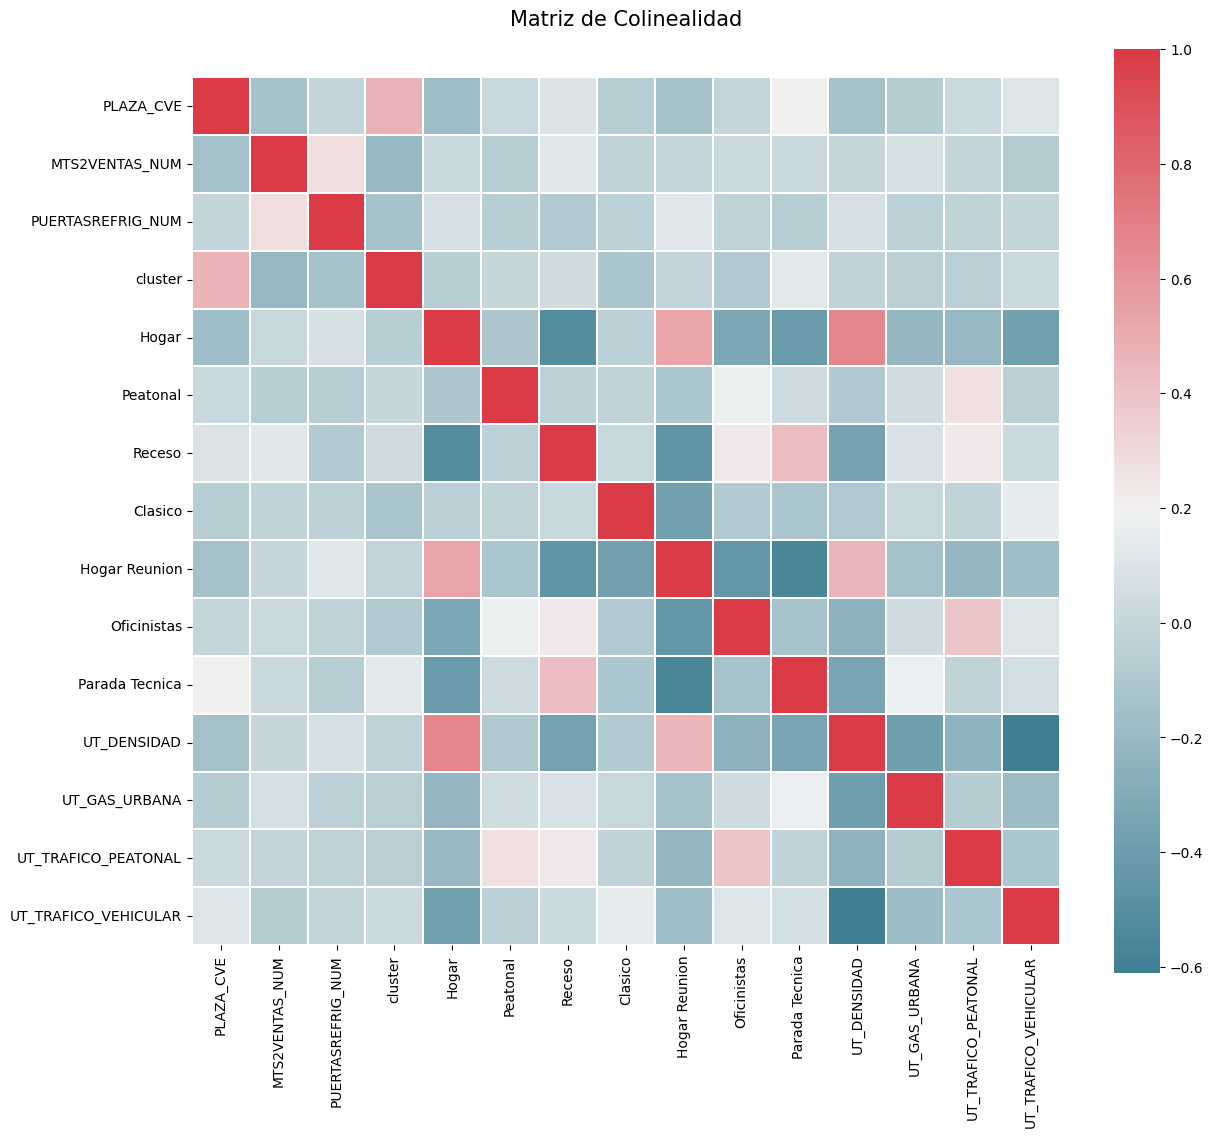

In [ ]:
#Se importa librería para heatmap
import seaborn as sns
from seaborn import heatmap

Xcor = file.copy()
Xcor = Xcor.drop('Exito',axis=1)
Xcor = One_Hot(Xcor,dummies=False)

#Se crea matriz de correlación
cor=abs(np.corrcoef(Xcor,rowvar=False))

#Se modifican las digonales
np.fill_diagonal(cor,0)

#Se verfica valores con mayor correlación
i,j=np.unravel_index(cor.argmax(),cor.shape)

#Se imprime las variables con mayor relación
print(f"La variables con mayor correlación son: {Xcor.columns[i]} y {Xcor.columns[j]}")
print(f"Con una correlación de: {cor[i,j]}")

# Mapa de colinearidad
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square=True,
        ax=ax,
        linewidths=0.1,vmax=1.0,
        annot_kws={'fontsize': 5 }
    )

    plt.title('Matriz de Colinealidad', y=1.05, size=15)


correlation_heatmap(Xcor)

In [ ]:
#Lectura y verificación de colinearidad para variables mayores a 0.7
for i in range(len(Xcor.columns)):
    for j in range(i,len(Xcor.columns)):
        if cor[i,j] > 0.7:
            print(f"Las variables son: {Xcor.columns[i]} y {Xcor.columns[j]}")
            print(f"Con una correlación de: {cor[i,j]}\n")

# **Modelos**

In [ ]:
from re import X
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Ahora puedes usar Xtrain_resampled y ytrain_resampled para entrenar tu modelo
Xtrain, Xtest, ytrain, Ytest = train_test_split(file.drop("Exito", axis=1), file["Exito"], test_size=0.2, stratify=file["Exito"], random_state=42)

# Inicializar SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE solo a los datos de entrenamiento
Xtrain, Ytrain = smote.fit_resample(Xtrain, ytrain)


## Regresión logística


In [ ]:
# Se importan librerías del modelo
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

# Se crea modelo de regresión logística y se entrena
Logistic_model = sm.GLM(Ytrain,sm.add_constant(Xtrain)).fit()

# Se realizan predicciones
yhat_lr = Logistic_model.predict(sm.add_constant(Xtest))

# Se muestra resumen de los datos
print(Logistic_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Exito   No. Observations:                 1174
Model:                            GLM   Df Residuals:                     1158
Model Family:                Gaussian   Df Model:                           15
Link Function:               Identity   Scale:                         0.22317
Method:                          IRLS   Log-Likelihood:                -777.37
Date:                Sun, 25 May 2025   Deviance:                       258.43
Time:                        17:08:38   Pearson chi2:                     258.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1254
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2398 

In [ ]:
#Se crea data frame de los coeficientes
print("P-values mayores a 0.05")
for i in range(1,len(list(Logistic_model.pvalues))):
    if Logistic_model.pvalues.iloc[i] > 0.05:
        print(f"{Xtrain.columns[i-1]:21}: {Logistic_model.pvalues.iloc[i]:4f}")

P-values mayores a 0.05
PUERTASREFRIG_NUM    : 0.793246
Hogar                : 0.057119
Peatonal             : 0.119527
Receso               : 0.470325
Oficinistas          : 0.117844
UT_DENSIDAD          : 0.149857
UT_GAS_URBANA        : 0.760904
UT_TRAFICO_PEATONAL  : 0.512051
UT_TRAFICO_VEHICULAR : 0.189600


In [ ]:
# Se crea model de sklearn
sklearn_logistic_model = LogisticRegression(max_iter=10000)

# Se realiza validación cruzada con accuracy
lr_cv_scores = cross_val_score(sklearn_logistic_model, Xtrain, Ytrain, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print("Resultados de validación cruzada:", lr_cv_scores)
print("Precisión media del modelo:", np.mean(lr_cv_scores))

# Se muestra valor de accuracy
print("Exactitud en test:",accuracy_score(Ytest,(yhat_lr>0.5).astype(int)))
print(f"LDA: \n{classification_report(Ytest,yhat_lr>0.5)}")

Resultados de validación cruzada: [0.64255319 0.66808511 0.64255319 0.64680851 0.6025641 ]
Precisión media del modelo: 0.6405128205128205
Exactitud en test: 0.5759162303664922
LDA: 
              precision    recall  f1-score   support

           0       0.27      0.53      0.36        43
           1       0.81      0.59      0.68       148

    accuracy                           0.58       191
   macro avg       0.54      0.56      0.52       191
weighted avg       0.69      0.58      0.61       191



## LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler

# Estandarización de datos
scaler = StandardScaler()
Xtrain_n = scaler.fit_transform(Xtrain)
Xtest_n = scaler.transform(Xtest)

# Crear modelo LDA
LDA_model = LDA(n_components=1).fit(Xtrain_n, Ytrain)

# Hacer predicciones
yhat_LDA = LDA_model.predict(Xtest_n)
yprob_LDA = LDA_model.predict_proba(Xtest_n)

# Se realiza validación cruzada con accuracy
lda_cv_scores = cross_val_score(LDA_model, Xtrain_n, Ytrain, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print("Resultados de validación cruzada:", lda_cv_scores)
print("Precisión media del modelo:", np.mean(lda_cv_scores))

# Se muestra valor de accuracy
print("Exactitud en test:",accuracy_score(Ytest,yhat_LDA>0.5))
print(f"LDA: \n{classification_report(Ytest,yhat_LDA)}")

Resultados de validación cruzada: [0.63829787 0.67234043 0.64680851 0.65531915 0.60683761]
Precisión media del modelo: 0.6439207128568831
Exactitud en test: 0.5759162303664922
LDA: 
              precision    recall  f1-score   support

           0       0.27      0.53      0.36        43
           1       0.81      0.59      0.68       148

    accuracy                           0.58       191
   macro avg       0.54      0.56      0.52       191
weighted avg       0.69      0.58      0.61       191



## Árboles BG


In [ ]:
# Se importa función
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import plot_tree as pt
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.ensemble import BaggingClassifier as BC

# Se genera y entrena modelo simple de bagging
bag_model = BC(estimator=DTC(), n_estimators=200, oob_score=True).fit(Xtrain_n,Ytrain)

# Predicciones
yhat_bag = bag_model.predict(Xtest_n)
yprob_bag = bag_model.predict_proba(Xtest_n)

# Se realiza validación cruzada con accuracy
bag_cv_scores = cross_val_score(bag_model, Xtrain_n, Ytrain, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print("Resultados de validación cruzada:", bag_cv_scores)
print("Precisión media del modelo:", np.mean(bag_cv_scores))

# Accuracy
print("Exactitud en test:",accuracy_score(Ytest,yhat_bag))
print(f"Bagging: \n{classification_report(Ytest,yhat_bag)}")

Resultados de validación cruzada: [0.69787234 0.79574468 0.86808511 0.90212766 0.86324786]
Precisión media del modelo: 0.8254155300963812
Exactitud en test: 0.7172774869109948
Bagging: 
              precision    recall  f1-score   support

           0       0.39      0.47      0.43        43
           1       0.84      0.79      0.81       148

    accuracy                           0.72       191
   macro avg       0.61      0.63      0.62       191
weighted avg       0.74      0.72      0.73       191



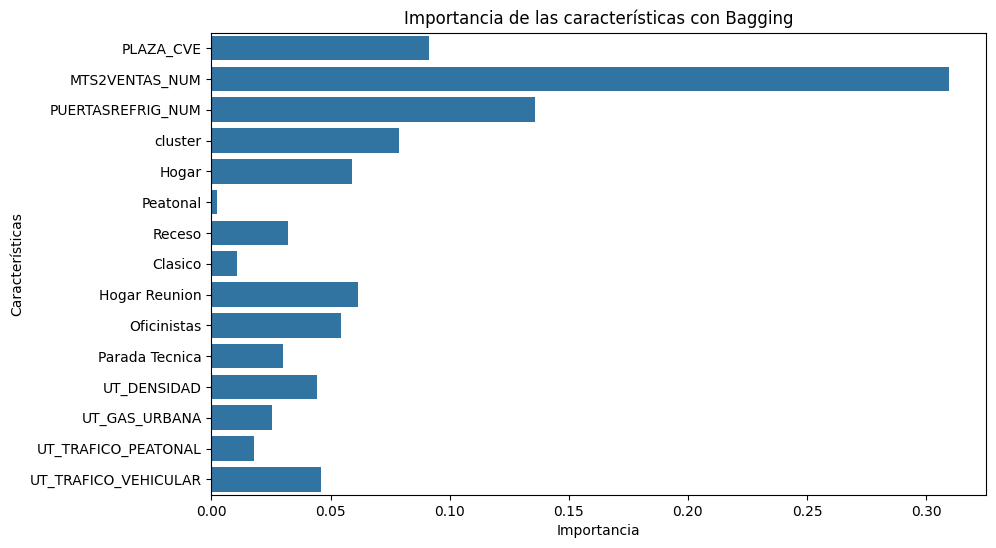

In [ ]:
# Se calcula la importancia promedio de características desde todos los árboles base
importances = np.mean([
    tree.feature_importances_ for tree in bag_model.estimators_
], axis=0)

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
# Use the columns from the original DataFrame Xtrain for the y-axis labels
sns.barplot(x=importances, y=Xtrain.columns)
plt.title('Importancia de las características con Bagging')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## Árboles RF

In [ ]:
# Se importa librería
from sklearn.ensemble import RandomForestClassifier as RFC

# Se genera y entrena modelo simple de random forest
rf_model = RFC(200, oob_score=True).fit(Xtrain_n,Ytrain)

# Predicciones
yhat_rf = rf_model.predict(Xtest_n)
yprob_rf = rf_model.predict_proba(Xtest_n)

# Se realiza validación cruzada con accuracy
rf_cv_scores = cross_val_score(rf_model, Xtrain_n, Ytrain, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print("Resultados de validación cruzada:", bag_cv_scores)
print("Precisión media del modelo:", np.mean(bag_cv_scores))

# Accuracy
print("Exactitud en test:",accuracy_score(Ytest,yhat_rf))
print(f"Bagging: \n{classification_report(Ytest,yhat_rf)}")

Resultados de validación cruzada: [0.69787234 0.79574468 0.86808511 0.90212766 0.86324786]
Precisión media del modelo: 0.8254155300963812
Exactitud en test: 0.7172774869109948
Bagging: 
              precision    recall  f1-score   support

           0       0.38      0.40      0.39        43
           1       0.82      0.81      0.82       148

    accuracy                           0.72       191
   macro avg       0.60      0.60      0.60       191
weighted avg       0.72      0.72      0.72       191



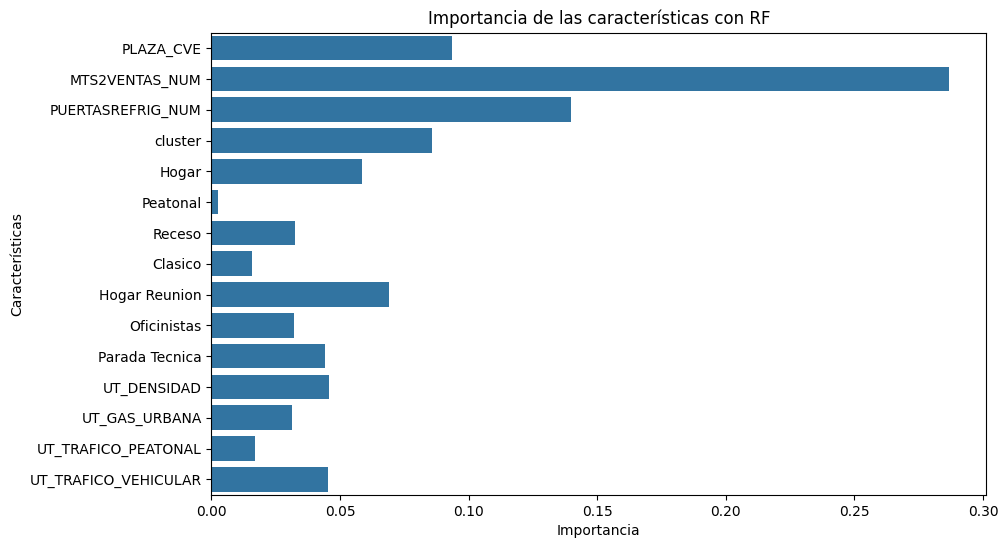

In [ ]:
# Características importantes
importances = rf_model.feature_importances_

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
# Use the columns from the original DataFrame Xtrain for the y-axis labels
sns.barplot(x=importances, y=Xtrain.columns)
plt.title('Importancia de las características con RF')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## XGB

In [ ]:
# Se importa librería
import xgboost as xgb

# Se crea modelo simple de boosting
XG = xgb.XGBClassifier(n_estimators= 200, objective='binary:logistic', use_label_encoder=False)

# Se entrena modelo
XG.fit(Xtrain_n,Ytrain)

# Se realizan predicicones
yhat_XG = XG.predict(Xtest_n)
yprob_XG = XG.predict_proba(Xtest_n)

# Se realiza validación cruzada con accuracy
XG_cv_scores = cross_val_score(XG, Xtrain_n, Ytrain, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print("Resultados de validación cruzada:", bag_cv_scores)
print("Precisión media del modelo:", np.mean(bag_cv_scores))

# Accuracy
print("Exactitud en test:",accuracy_score(Ytest,yhat_XG))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Resultados de validación cruzada: [0.69787234 0.79574468 0.86808511 0.90212766 0.86324786]
Precisión media del modelo: 0.8254155300963812
Exactitud en test: 0.7068062827225131


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:09:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


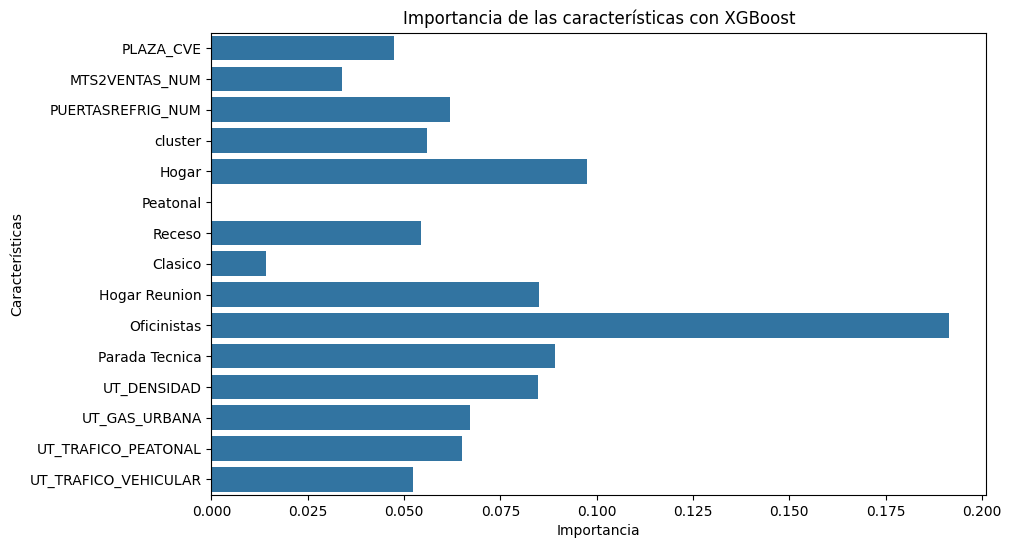

In [ ]:
importances = XG.feature_importances_

# Gráfico de la importancia de las características
plt.figure(figsize=(10, 6))
# Use the columns from the original DataFrame Xtrain for the y-axis labels
sns.barplot(x=importances, y=Xtrain.columns)
plt.title('Importancia de las características con XGBoost')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

## SVM

In [ ]:
# Se importan librerías necesarias
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Se crea el modelo SVM (con probabilidad activada)
SVM_model = SVC(kernel='rbf', C=1.0, probability=True)

# Se entrena el modelo
SVM_model.fit(Xtrain_n, Ytrain)

# Se realizan predicciones
yhat_SVM = SVM_model.predict(Xtest_n)
yprob_SVM = SVM_model.predict_proba(Xtest_n)

# Se realiza validación cruzada con accuracy
SVM_cv_scores = cross_val_score(SVM_model, Xtrain_n, Ytrain, cv=5, scoring='accuracy')

# Imprimir resultados de la validación cruzada
print("Resultados de validación cruzada:", SVM_cv_scores)
print("Precisión media del modelo:", np.mean(SVM_cv_scores))

# Accuracy en test
print("Exactitud en test:", accuracy_score(Ytest, yhat_SVM))

Resultados de validación cruzada: [0.68085106 0.70212766 0.79148936 0.7787234  0.75641026]
Precisión media del modelo: 0.7419203491543918
Exactitud en test: 0.6963350785340314


## Modelo NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


model = Sequential([
    Dense(9, activation='relu', input_shape=(Xtrain.shape[1],)),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(Xtrain_n, Ytrain,
                    epochs=20,       # Puedes ajustar este número
                    batch_size=5,   # Puedes ajustar este número
                    validation_split=0.2) # Usa el 20% de los datos de entrenamiento para validar

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(Xtest_n, Ytest, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 9)              │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 9)              │            36 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 5)              │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 286 (1.12 KB)

 Trainable params: 258 (1.01 KB)

 Non-trainable params: 28 (112.00 B)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5646 - loss: 0.7898 - val_accuracy: 0.0936 - val_loss: 0.8684
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6020 - loss: 0.7290 - val_accuracy: 0.1064 - val_loss: 0.8774
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6041 - loss: 0.7001 - val_accuracy: 0.0723 - val_loss: 0.8665
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6121 - loss: 0.6838 - val_accuracy: 0.0383 - val_loss: 0.8772
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6183 - loss: 0.6705 - val_accuracy: 0.0553 - val_loss: 0.8821
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6086 - loss: 0.6594 - val_accuracy: 0.0340 - val_loss: 0.8962
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6136 - loss: 0.6719 - val_accuracy: 0.0170 - val_loss: 0.9035
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6411 - loss: 0.6646 - val_accuracy: 0.

# Reporte de datos

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay as cmd

#Función para curva ROC y AUC
def curva_ROC(Yt=None,prob=None, title=None):
    # Se obtiene valores de la curva ROC
    fpr, tpr, thresholds = roc_curve(Yt, prob)

    # Se obtiene el valor de la AUC
    auc_value = roc_auc_score(Yt, prob)
    #print(f"AUC: {auc_value:.4f}")

    # Gráfica de la curva ROC
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_value:.4f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('1 - Especificidad')
    plt.ylabel('Sensibilidad')
    plt.title(f"Curva ROC - {title}")
    plt.legend(loc="lower right")

## Valores

In [ ]:
print(f"Regresión Logística: \n{lr_cv_scores}")
print("Precisión media del modelo:", np.mean(lr_cv_scores))

print(f"\nLDA: \n{lda_cv_scores}\n")
print("Precisión media del modelo:", np.mean(lda_cv_scores))

print(f"\nBagging: \n{bag_cv_scores}\n")
print("Precisión media del modelo:", np.mean(bag_cv_scores))

print(f"\nRandom Forest: \n{rf_cv_scores} \n")
print("Precisión media del modelo:", np.mean(rf_cv_scores))

print(f"\nXgboost: \n{XG_cv_scores}\n")
print("Precisión media del modelo:", np.mean(XG_cv_scores))

Regresión Logística: 
[0.64255319 0.66808511 0.64255319 0.64680851 0.6025641 ]
Precisión media del modelo: 0.6405128205128205

LDA: 
[0.63829787 0.67234043 0.64680851 0.65531915 0.60683761]

Precisión media del modelo: 0.6439207128568831

Bagging: 
[0.69787234 0.79574468 0.86808511 0.90212766 0.86324786]

Precisión media del modelo: 0.8254155300963812

Random Forest: 
[0.66808511 0.78297872 0.87659574 0.89361702 0.88888889] 

Precisión media del modelo: 0.8220330969267138

Xgboost: 
[0.67234043 0.78723404 0.87234043 0.86808511 0.87606838]

Precisión media del modelo: 0.8152136752136752


## Martriz de confusión

<Figure size 1200x500 with 0 Axes>

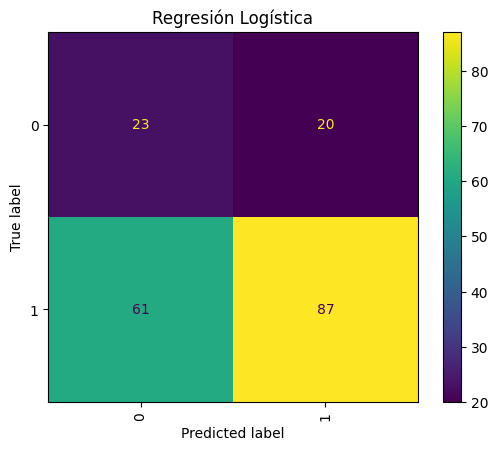

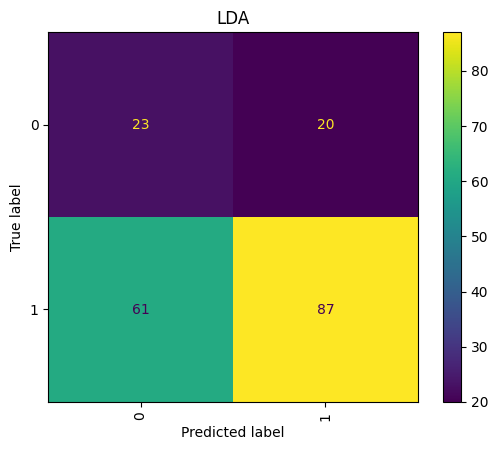

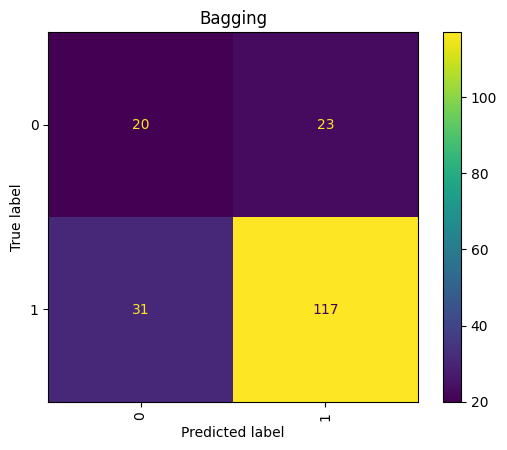

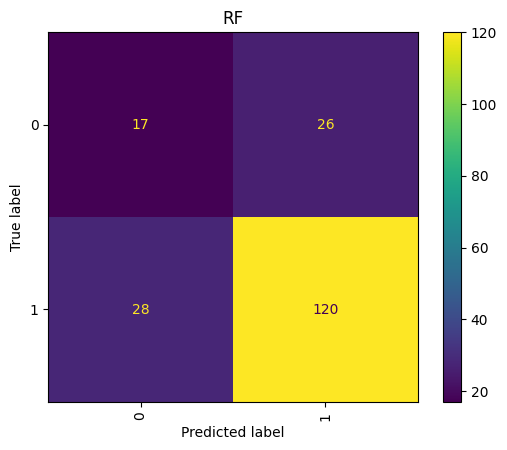

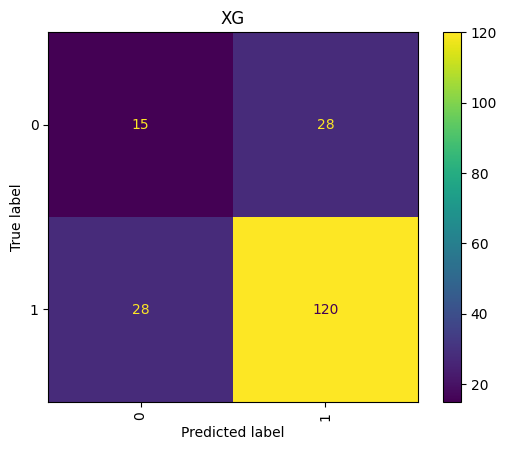

In [ ]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,5))

#RL
cm = confusion_matrix(Ytest,(yhat_lr>0.5).astype(int))
cmd(cm).plot(xticks_rotation="vertical")
plt.title('Regresión Logística')

#LDA
cm = confusion_matrix(Ytest,yhat_LDA)
cmd(cm).plot(xticks_rotation="vertical")
plt.title('LDA')

#Bagging
cm = confusion_matrix(Ytest,yhat_bag)
cmd(cm).plot(xticks_rotation="vertical")
plt.title('Bagging')

#RF
cm = confusion_matrix(Ytest,yhat_rf)
cmd(cm).plot(xticks_rotation="vertical")
plt.title('RF')

#XG
cm = confusion_matrix(Ytest,yhat_XG)
cmd(cm).plot(xticks_rotation="vertical")
plt.title('XG')

#Se muestran gráficas
plt.show()

## Curvas ROC y AUC

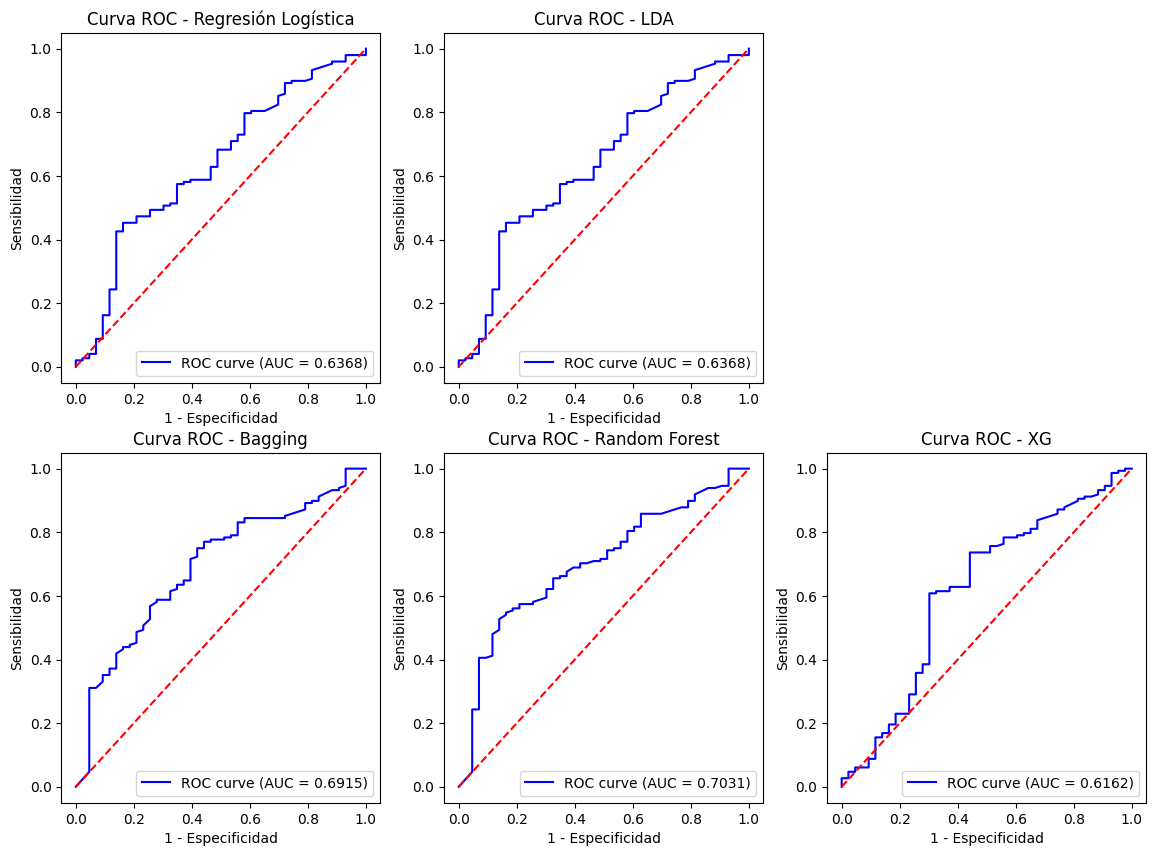

In [ ]:
plt.figure(figsize=(14,10))

#RL
plt.subplot(2,3,1)
curva_ROC(Ytest,yhat_lr,"Regresión Logística")

#LDA
plt.subplot(2,3,2)
curva_ROC(Ytest,yprob_LDA[:,1],"LDA")

#Bagging
plt.subplot(2,3,4)
curva_ROC(Ytest,yprob_bag[:,1],"Bagging")

#RF
plt.subplot(2,3,5)
curva_ROC(Ytest,yprob_rf[:,1],"Random Forest")

#XG
plt.subplot(2,3,6)
curva_ROC(Ytest,yprob_XG[:,1],"XG")

#Se muestran gráficas
plt.show()

## **Cargar datos test para evaluación final**

In [ ]:
file = pd.read_csv("/content/drive/My Drive/1a IMT_Facultad/Datathon 25/DIM_tienda_test_with_clusters_NEW.csv")


file.loc[file['ENTORNO_DES'] == "Base", 'Exito'] = file['PROMEDIO_VENTA_TOTAL']/480000
file.loc[file['ENTORNO_DES'] == "Hogar", 'Exito'] =  file['PROMEDIO_VENTA_TOTAL']/490000
file.loc[file['ENTORNO_DES'] == "Peatonal", 'Exito'] = file['PROMEDIO_VENTA_TOTAL']/420000
file.loc[file['ENTORNO_DES'] == "Receso", 'Exito'] = file['PROMEDIO_VENTA_TOTAL']/516000

file["Exito"] = (file["Exito"] > 1.5).astype(int)
file = file.drop(["TIENDA_ID","PROMEDIO_VENTA_TOTAL","DATASET","NIVELSOCIOECONOMICO_DES"], axis=1)
file_2 = file.copy()
file = file.drop(["LATITUD_NUM","LONGITUD_NUM"], axis=1)
file = One_Hot(file, dummies=True, drop_var=True, col=None, show=False)
print(file["Exito"].value_counts())

file.head()

Exito
1    81
0    24
Name: count, dtype: int64


,PLAZA_CVE,MTS2VENTAS_NUM,PUERTASREFRIG_NUM,cluster,Exito,Hogar,Peatonal,Receso,Clasico,Hogar Reunion,Oficinistas,Parada Tecnica,UT_DENSIDAD,UT_GAS_URBANA,UT_TRAFICO_PEATONAL,UT_TRAFICO_VEHICULAR
0,1,102.36,13,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,97.43,14,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,117.01,13,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,109.76,13,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,0.00,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
Xtest, Ytest = (file.drop(["Exito"], axis=1), file["Exito"])

Xtest_n = scaler.transform(Xtest)

yhat_lr = Logistic_model.predict(sm.add_constant(Xtest))
print("Exactitud de lr en test:",accuracy_score(Ytest,(yhat_lr>0.5).astype(int)))

yhat_bag = bag_model.predict(Xtest_n)
print("Exactitud de bag en test:",accuracy_score(Ytest,yhat_bag))

yhat_rf = rf_model.predict(Xtest_n)
print("Exactitud de rf en test:",accuracy_score(Ytest,yhat_rf))

yhat_XG = XG.predict(Xtest_n)
print("Exactitud de XG en test:",accuracy_score(Ytest,yhat_XG))

# Se realizan predicciones
yhat_SVM = SVM_model.predict(Xtest_n)
# Accuracy en test
print("Exactitud de SVM en test:", accuracy_score(Ytest, yhat_SVM))

#NN
model.evaluate(Xtest_n, Ytest)
print("Exactitud de NN en test:",model.evaluate(Xtest_n, Ytest)[1])

Exactitud de lr en test: 0.6857142857142857
Exactitud de bag en test: 0.7523809523809524
Exactitud de rf en test: 0.8
Exactitud de XG en test: 0.7714285714285715
Exactitud de SVM en test: 0.7333333333333333
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7648 - loss: 0.6368
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7648 - loss: 0.6368
Exactitud de NN en test: 0.7714285850524902


## Mapa final

In [ ]:
import folium
from IPython.display import display

# Filtrar los datos por éxito y fracaso
exitos = file_2[file_2['Exito'] == 1]
fracasos = file_2[file_2['Exito'] == 0]

# Calcular el centro del mapa (usando todos los datos)
center_lat = file_2['LATITUD_NUM'].mean()
center_lon = file_2['LONGITUD_NUM'].mean()

# Crear el mapa base
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Añadir puntos para los éxitos (verdes)
for index, row in exitos.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD_NUM'], row['LONGITUD_NUM']],
        radius=5,  # Ajusta el tamaño del punto si es necesario
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7
    ).add_to(m)

# Añadir puntos para los fracasos (rojos)
for index, row in fracasos.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD_NUM'], row['LONGITUD_NUM']],
        radius=5,  # Ajusta el tamaño del punto si es necesario
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(m)

# Mostrar el mapa
display(m)

## Predicción de modelo


In [ ]:
# Use the boolean arrays directly to filter the DataFrame file_2
exitos = file_2[yhat_rf == 1]
fracasos = file_2[yhat_rf == 0]

# Calcular el centro del mapa (usando todos los datos)
center_lat = file_2['LATITUD_NUM'].mean()
center_lon = file_2['LONGITUD_NUM'].mean()

# Crear el mapa base
m = folium.Map(location=[center_lat, center_lon], zoom_start=10)

# Añadir puntos para los éxitos (verdes)
# Now exitos is a DataFrame, so iterrows() will work
for index, row in exitos.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD_NUM'], row['LONGITUD_NUM']],
        radius=5,  # Ajusta el tamaño del punto si es necesario
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7
    ).add_to(m)

# Añadir puntos para los fracasos (rojos)
# Now fracasos is a DataFrame, so iterrows() will work
for index, row in fracasos.iterrows():
    folium.CircleMarker(
        location=[row['LATITUD_NUM'], row['LONGITUD_NUM']],
        radius=5,  # Ajusta el tamaño del punto si es necesario
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7
    ).add_to(m)

# Mostrar el mapa
display(m)